# Ejercicio de k-Nearest Neighbor
Realizaremos un ejercicio de prueba para comprender como funciona este algoritmo

K-Nearest-Neighbor es un algoritmo basado en instancia de tipo supervisado de Machine Learning. Puede usarse para clasificar nuevas muestras (valores discretos) o para predecir (regresión, valores continuos). Al ser un método sencillo, es ideal para introducirse en el mundo del  Aprendizaje Automático. Sirve esencialmente para clasificar valores buscando los puntos de datos “más similares” (por cercanía) aprendidos en la etapa de entrenamiento y haciendo conjeturas de nuevos puntos basado en esa clasificación.

A diferencia de K-means, que es un algoritmo no supervisado y donde la “K” significa la cantidad de “grupos” (clusters) que deseamos clasificar, en K-Nearest Neighbor la “K” significa la cantidad de “puntos vecinos” que tenemos en cuenta en las cercanías para clasificar los “n” grupos -que ya se conocen de antemano, pues es un algoritmo supervisado-.

### ¿Qué es el algoritmo k-Nearest Neighbor?

Es un método que simplemente busca en las observaciones más cercanas a la que se está tratando de predecir y clasifica el punto de interés basado en la mayoría de datos que le rodean. Como dijimos antes, es un algoritmo:

* __Supervisado__: esto -brevemente- quiere decir que tenemos etiquetado nuestro conjunto de datos de entrenamiento, con la clase o resultado esperado dada “una fila” de datos.
* __Basado en Instancia__: Esto quiere decir que nuestro algoritmo no aprende explícitamente un modelo (como por ejemplo en Regresión Logística o árboles de decisión). En cambio memoriza las instancias de entrenamiento que son usadas como “base de conocimiento” para la fase de predicción.

### ¿Dónde se aplica k-Nearest Neighbor?

Aunque sencillo, se utiliza en la resolución de multitud de problemas, como en __sistemas de recomendación, búsqueda semántica y detección de anomalías__.

### Pros y contras

Como __pros__ tiene sobre todo que es sencillo de aprender e implementar. Tiene como __contras__ que utiliza todo el dataset para entrenar “cada punto” y por eso requiere de uso de mucha memoria y recursos de procesamiento (CPU). Por estas razones kNN tiende a funcionar mejor en datasets pequeños y sin una cantidad enorme de features (las columnas).

# Objetivo
__En este notebook intentaremos predecir que sentimiento tuvo un usuario al calificar una app, en base al número de palabras que escribe en la review__

Para nuestro ejercicio tomaremos 257 registros con Opiniones de usuarios sobre una app (Reviews). Utilizaremos 2 columnas de datos como fuente de alimento del algoritmo. Recuerden que sólo tomaré 2 features para poder graficar en 2 dimensiones, PERO para un problema “en la vida real” conviene tomar más características de lo que sea que queramos resolver. Esto es únicamente con fines de enseñanza. Las columnas que utilizaremos serán: wordcount con la cantidad de palabras utilizadas y sentimentValue con un valor entre -4 y 4 que indica si el comentario fue valorado como positivo o negativo. Nuestras etiquetas, serán las estrellas que dieron los usuarios a la app, que son valores discretos del 1 al 5. Podemos pensar que si el usuario puntúa con más estrellas, tendrá un sentimiento positivo, pero no necesariamente siempre es así.

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Leemos nuestro archivo de entrada

In [2]:
dataframe = pd.read_csv(r"reviews_sentiment.csv",sep=';')
dataframe.head(10)

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NaN,negative,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas...,17,NaN,negative,1,-0.616271
4,Esta bien,Sin ser la biblia.... Esta bien,6,negative,negative,1,-0.651784
5,Buena,Nada del otro mundo pero han mejorado mucho,8,positive,negative,1,-0.720443
6,De gran ayuda,"Lo malo q necesita de …,pero la app es muy buena",23,positive,negative,1,-0.726825
7,Muy buena,"Estaba más acostumbrado al otro diseño, pero e...",16,positive,negative,1,-0.736769
8,Ta to guapa.,Va de escándalo,21,positive,negative,1,-0.765284
9,Se han corregido,Han corregido muchos fallos pero el diseño es ...,13,negative,negative,1,-0.797961


In [3]:
dataframe.describe() # Resumen estadistico de nuestros datos

,wordcount,Star Rating,sentimentValue
count,257.000000,257.000000,257.000000
mean,11.501946,3.420233,0.383849
std,13.159812,1.409531,0.897987
min,1.000000,1.000000,-2.276469
25%,3.000000,3.000000,-0.108144
50%,7.000000,3.000000,0.264091
75%,16.000000,5.000000,0.808384
max,103.000000,5.000000,3.264579


Son 257 registros. Las estrellas lógicamente vemos que van del 1 al 5. La cantidad de palabras van de 1 sóla hasta 103. y las valoraciones de sentimiento están entre -2.27 y 3.26 con una media de 0,38 y a partir del desvío estándar podemos ver que la mayoría están entre 0,38-0,89 y 0,38+0,89.

## Rápidas visualizaciones
Vemos que la distribución de “estrellas” no está balanceada… esto no es bueno. Convendría tener las mismas cantidades en las salidas, para no tener resultados “tendenciosos”. Para este ejercicio lo dejaremos así, pero en la vida real, debemos equilibrarlos. La gráfica de Valores de Sentimientos parece bastante una campana movida levemente hacia la derecha del cero y la cantidad de palabras se centra sobre todo de 0 a 10.

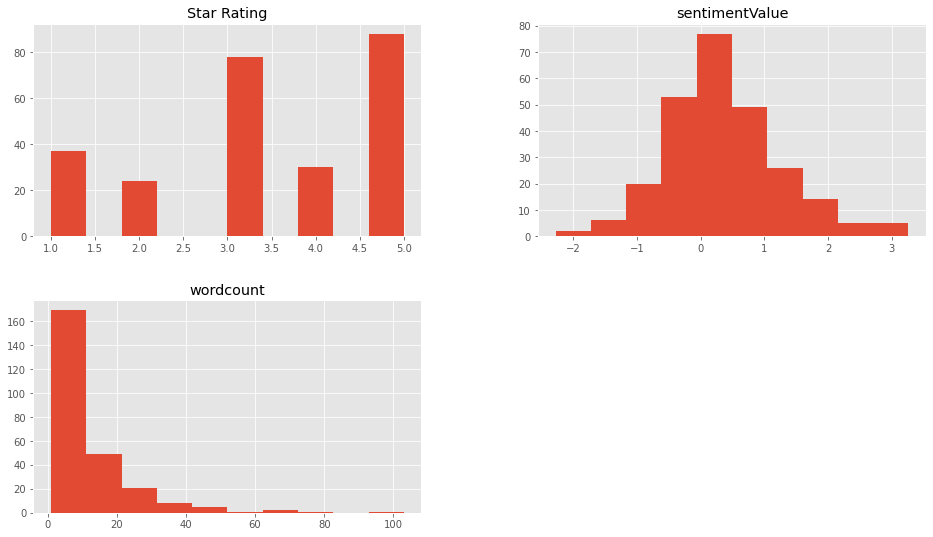

In [4]:
dataframe.hist()
plt.show()

Número de Valoraciones de Estrellas que tenemos (con lo que confirmamos que sobre todo, las valoraciones van entre 3 y 5 estrellas):

In [5]:
print(dataframe.groupby('Star Rating').size())

Star Rating
1    37
2    24
3    78
4    30
5    88
dtype: int64


Mostremos esta distribución de estrellas en una gráfica

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


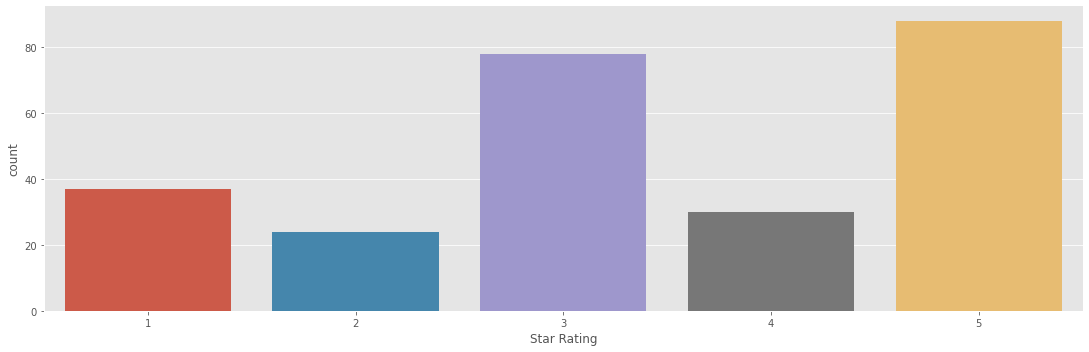

In [6]:
sb.factorplot('Star Rating',data=dataframe,kind="count", aspect=3)

Hagamos una gráfica que ilustre mejor la cantidad de palabras y confirmamos que la mayoría están entre 1 y 10 palabras.

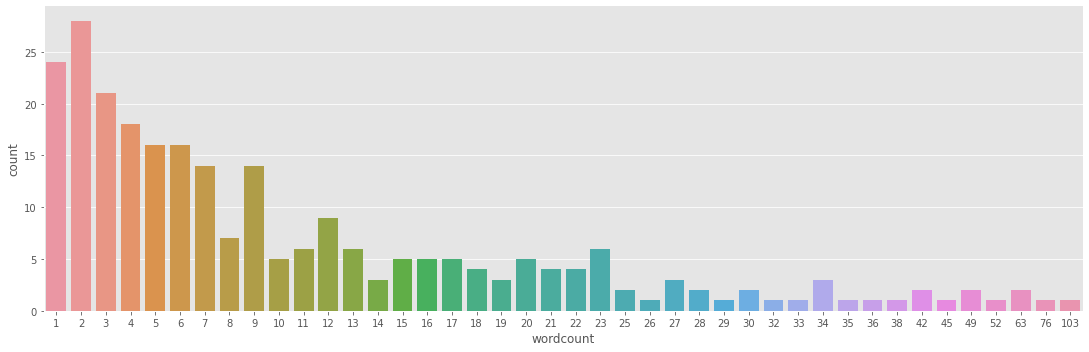

In [7]:
sb.factorplot('wordcount',data=dataframe,kind="count", aspect=3)

## Preparamos las entradas del dataset
Creamos nuestro X e y de entrada y los sets de entrenamiento y test.

In [8]:
X = dataframe[['wordcount','sentimentValue']].values
y = dataframe['Star Rating'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Creamos el Modelo
Definimos el valor de k en 7 (esto realmente lo sabemos más adelante, ya veréis) y creamos nuestro clasificador.

In [9]:
n_neighbors = 7

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.90
Accuracy of K-NN classifier on test set: 0.86


Vemos que la precisión que nos da es de 90% en el set de entrenamiento y del 86% para el de test.

NOTA: como verán utilizamos la clase KNeighborsClassifier de SciKit Learn puesto que nuestras etiquetas son valores discretos (estrellas del 1 al 5). Pero deben saber que también existe la clase KneighborsRegressor para etiquetas con valores continuos.

## Precisión del modelo -> Resultados obtenidos
Confirmemos la precisión viendo la Confusión Matrix y el Reporte sobre el conjunto de test, que nos detalla los aciertos y fallos:

[[ 9  0  1  0  0]
 [ 0  1  0  0  0]
 [ 0  1 17  0  1]
 [ 0  0  2  8  0]
 [ 0  0  4  0 21]]


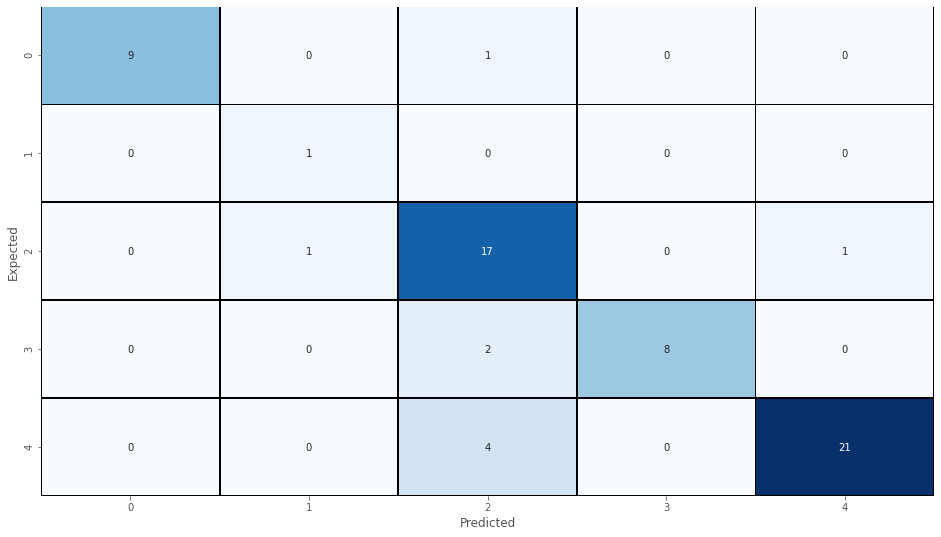

In [10]:
pred = knn.predict(X_test)
matriz_confusion = confusion_matrix(y_test, pred)
print(matriz_confusion)

sb.heatmap(matriz_confusion, annot=True, cbar=False, linecolor='black',linewidths=0.7, cmap=plt.cm.Blues,fmt='g' )
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [11]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       1.00      0.90      0.95        10
           2       0.50      1.00      0.67         1
           3       0.71      0.89      0.79        19
           4       1.00      0.80      0.89        10
           5       0.95      0.84      0.89        25

    accuracy                           0.86        65
   macro avg       0.83      0.89      0.84        65
weighted avg       0.89      0.86      0.87        65



Cómo se ve la puntuación F1 es del 86%, bastante buena. NOTA: recuerden que este es sólo un ejercicio para aprender y tenemos MUY pocos registros totales y en nuestro conjunto de test. Por ejemplo de 2 estrellas sólo tiene 1 valoración y esto es evidentemente insuficiente.

# Gráfica de la Clasificación Obtenida
Ahora realizaremos la grafica con la clasificación obtenida, la que nos ayuda a ver fácilmente en donde caerán las predicciones. NOTA: al ser 2 features, podemos hacer la gráfica 2D y si fueran 3 podría ser en 3D. Pero para usos reales, podríamos tener  más de 3 dimensiones y no importaría  poder visualizarlo sino el resultado del algoritmo.

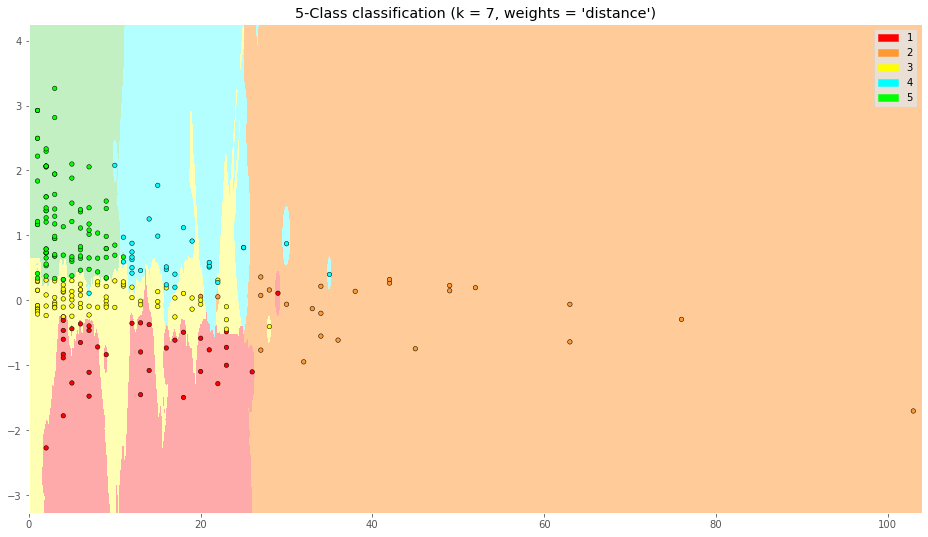

In [12]:
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#ffcc99', '#ffffb3','#b3ffff','#c2f0c2'])
cmap_bold = ListedColormap(['#FF0000', '#ff9933','#FFFF00','#00ffff','#00FF00'])

# we create an instance of Neighbours Classifier and fit the data.
clf = KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
    
patch0 = mpatches.Patch(color='#FF0000', label='1')
patch1 = mpatches.Patch(color='#ff9933', label='2')
patch2 = mpatches.Patch(color='#FFFF00', label='3')
patch3 = mpatches.Patch(color='#00ffff', label='4')
patch4 = mpatches.Patch(color='#00FF00', label='5')
plt.legend(handles=[patch0, patch1, patch2, patch3,patch4])

    
plt.title("5-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, 'distance'))

plt.show()

Vemos las 5 zonas en las que se relacionan cantidad de palabras con el valor de sentimiento de la Review que deja el usuario.

Es decir que “a ojo” una review de 20 palabras y Sentimiento 1, nos daría una valoración de 4 (zona azul).

Con estas zonas podemos intuir ciertas características de los usuarios que usan y valoran la app:

* Los usuarios que ponen 1 estrella tienen sentimiento negativo y hasta 25 palabras.
* Los usuarios que ponen 2 estrellas dan muchas explicaciones (hasta 100 palabras) y su sentimiento puede variar entre negativo y algo positivo.
* Los usuarios que ponen 3 estrellas son bastante neutrales en sentimientos, puesto que están en torno al cero y hasta unas 25 palabras.
* Los usuarios que dan 5 estrellas son bastante positivos (de 0,5 en adelante, aproximadamente) y ponen pocas palabras (hasta 10).

## Cómo obtener el mejor valor de k
Antes vimos que asignamos el valor n_neighbors=7 como valor de “k” y obtuvimos buenos resultados. ¿Pero de donde salió ese valor?. Pues realmente tuve que ejecutar este código que viene a continuación, donde vemos distintos valores k y la precisión obtenida.

([<matplotlib.axis.XTick at 0x1fad17faca0>,
 <a list of 5 Text major ticklabel objects>)

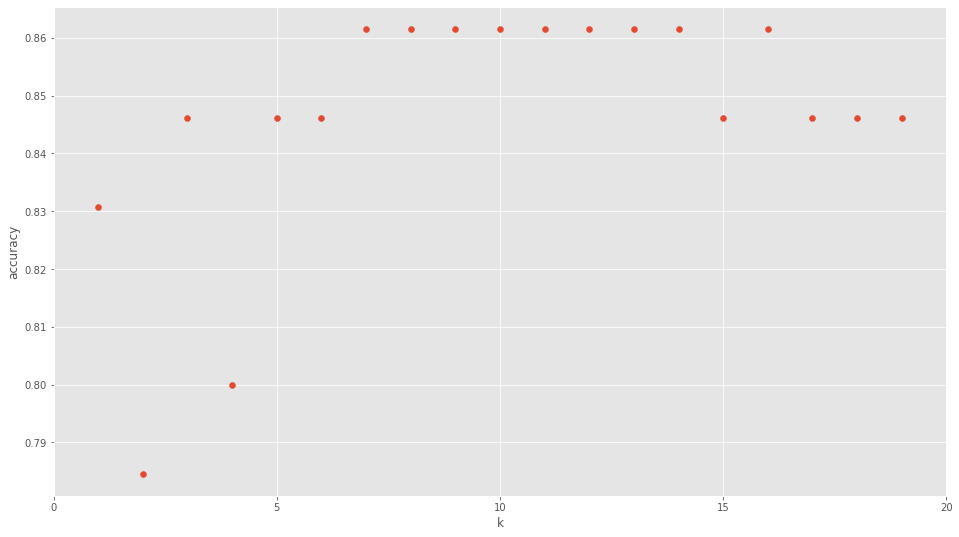

In [13]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

En la gráfica vemos que con valores k=7 a k=14 es donde mayor precisión se logra.

# Clasificar y/o Predecir nuevas muestras
Ya tenemos nuestro modelo y nuestro valor de k. Ahora, lo lógico será usarlo! Pues supongamos que nos llegan nuevas reviews! veamos como predecir sus estrellas de 2 maneras. La primera:

In [14]:
print(clf.predict([[5, 1.0]]))

[5]


Este resultado nos indica que para 5 palabras y sentimiento 1, nos valorarán la app con 5 estrellas.

Pero también podríamos obtener las probabilidades que de nos den 1, 2,3,4 o 5 estrellas con predict_proba():

In [15]:
print(clf.predict_proba([[20, 0.0]]))

[[0.00381998 0.02520212 0.97097789 0.         0.        ]]


Aquí vemos que para las coordenadas 20, 0.0 hay 97% probabilidades que nos den 3 estrellas. Puedes comprobar en el gráfico anterior, que encajan en las zonas que delimitamos anteriormente.